In [ ]:
pip install squarify

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import re

In [ ]:
# Load the dataset
df = pd.read_excel('Retail_Transaction_Dataset.xlsx')

In [ ]:
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,2023-08-05 00:00:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,2024-03-11 18:51:00,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,2023-10-27 22:00:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


# **Exploratory Data Analysis (EDA) for Customer Segmentation:**


Q1. What is the distribution of customers across different demographic segments? (e.g., age, gender, location)


In [ ]:

# Function to extract state
def extract_state(StoreLocation):
    parts = StoreLocation.split('\n')[-1].split(',')
    if len(parts) == 2:
        state_zip = parts[1].strip().split(' ')
        if len(state_zip) == 2:
            state = state_zip[0]
            return state
    return None

# Apply the function to add a new 'State' column
df['State'] = df['StoreLocation'].apply(extract_state)

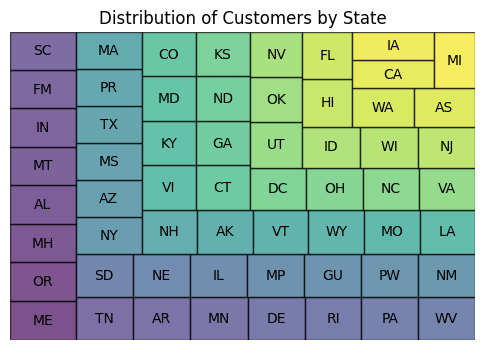

In [ ]:
# Aggregate customer data by state
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'customers']

# Plot the tree map
plt.figure(figsize=(6, 4))
squarify.plot(sizes=state_counts['customers'], label=state_counts['State'], alpha=0.7, color=sns.color_palette('viridis', len(state_counts)), edgecolor='black')
plt.title('Distribution of Customers by State')
plt.axis('off')
plt.show()

Key Insights:
1. Larger states like California, Texas, and Florida have larger rectangles, suggesting they have more customers.
2. Smaller states and territories like Rhode Island (RI) and Puerto Rico (PR) have smaller rectangles.

Q2. Can you identify any patterns or trends in purchase behaviour based on customer segments?

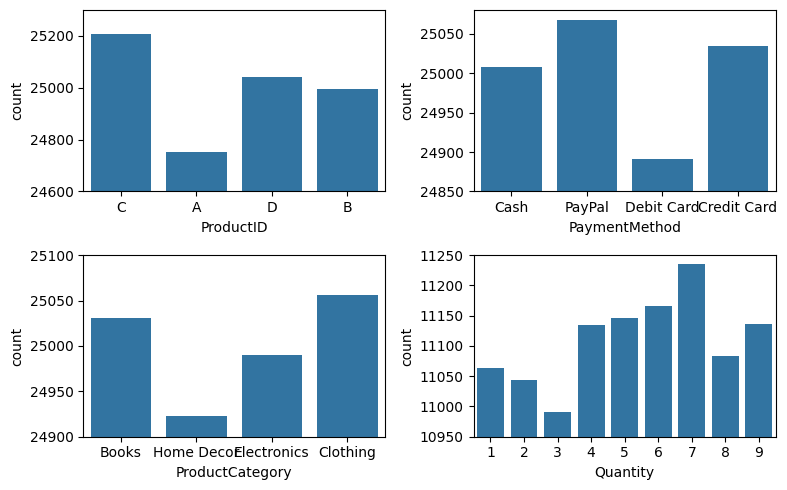

In [ ]:
# Create count plots for each column using seaborn
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
sns.countplot(x='ProductID', data=df)
plt.ylim(24600, 25300)

plt.subplot(2,2, 2)
sns.countplot(x='PaymentMethod', data=df)
plt.ylim(24850, 25080)

plt.subplot(2,2, 3)
sns.countplot(x='ProductCategory', data=df)
plt.ylim(24900, 25100)

plt.subplot(2,2,4)
sns.countplot(x='Quantity', data=df )
plt.ylim(10950, 11250)

plt.tight_layout()
plt.show()

Key Insight:

ProductID,Quantity, PaymentMethod and ProductCategory have almost equal distribution of cutomers.


<ipython-input-8-d78db21efb93>:18: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


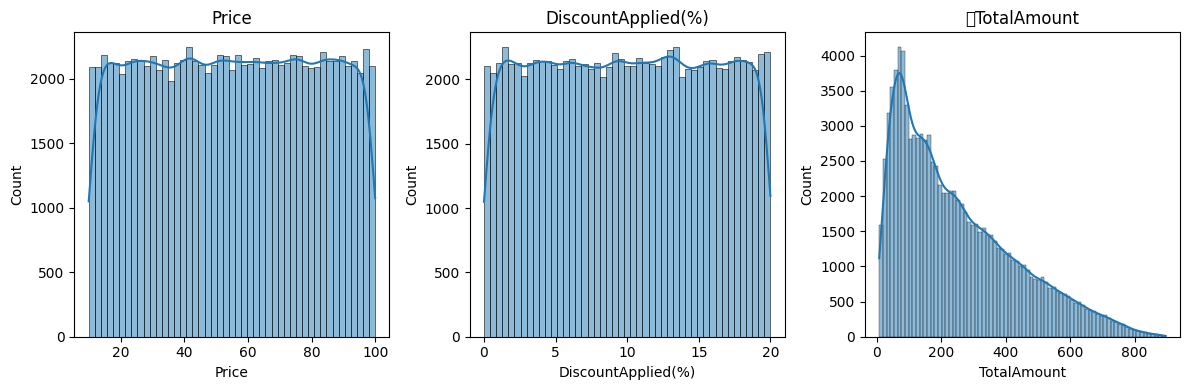

In [ ]:
# Create histograms for each column using seaborn
plt.figure(figsize=(12, 4))


plt.subplot(1,3,1)
sns.histplot(df['Price'], kde=True)
plt.title('Price')


plt.subplot(1,3,2)
sns.histplot(df['DiscountApplied(%)'], kde=True)
plt.title('DiscountApplied(%)')

plt.subplot(1,3,3)
sns.histplot(df['TotalAmount'], kde=True)
plt.title('	TotalAmount')

plt.tight_layout()
plt.show()

Key Insights:
1. Most transactions have lower total amounts (under 200) and it shows a strong right-skewed distribution
2. Most prices fall between 20 and 80, and the distribution is relatively uniform, with a slight peak around 50-60.
3. Discounts range from 0% to 20% and the distribution is fairly uniform.

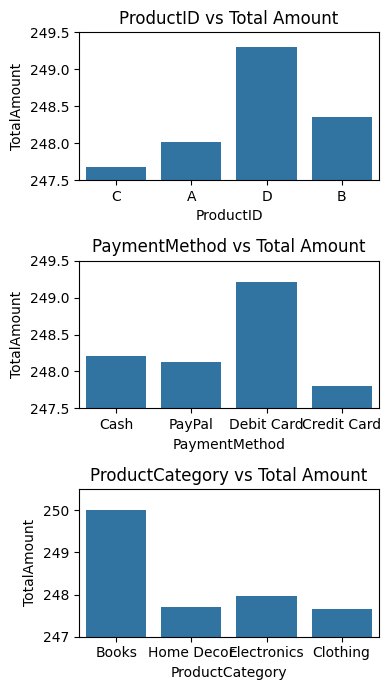

In [ ]:
# Plotting using Seaborn
plt.figure(figsize=(4, 7))

# Plot for ProductID vs TotalAmount
plt.subplot(3, 1, 1)
sns.barplot(x='ProductID', y='TotalAmount', data=df, errorbar=None)
plt.title('ProductID vs Total Amount')
plt.ylim(247.5,249.5)

# Plot for PaymentMethod vs TotalAmount
plt.subplot(3, 1, 2)
sns.barplot(x='PaymentMethod', y='TotalAmount', data=df, errorbar=None)
plt.title('PaymentMethod vs Total Amount')
plt.ylim(247.5,249.5)

# Plot for ProductCategory vs TotalAmount
plt.subplot(3, 1, 3)
sns.barplot(x='ProductCategory', y='TotalAmount', data=df, errorbar=None)
plt.title('ProductCategory vs Total Amount')
plt.ylim(247,250.5)


plt.tight_layout()
plt.show()

Key Insights:
1. Products with ID 'D' have a slighltly higher total amount.
2. Total amount payed by Debit Card was a little higher.
3. Books were brought slightly more than others.

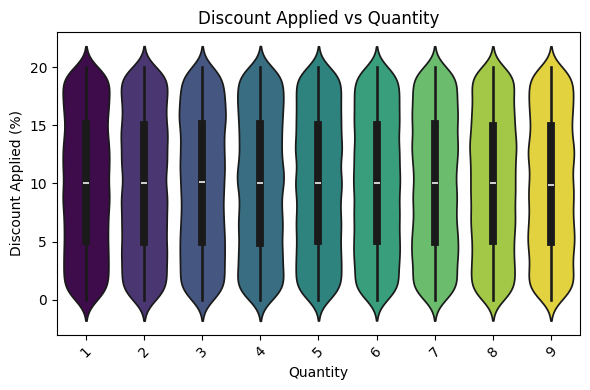

In [ ]:
# Plotting the violin plot
plt.figure(figsize=(6, 4))
sns.violinplot(x='Quantity', y='DiscountApplied(%)', data=df, palette='viridis',hue='Quantity', legend=False)
plt.title('Discount Applied vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Discount Applied (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

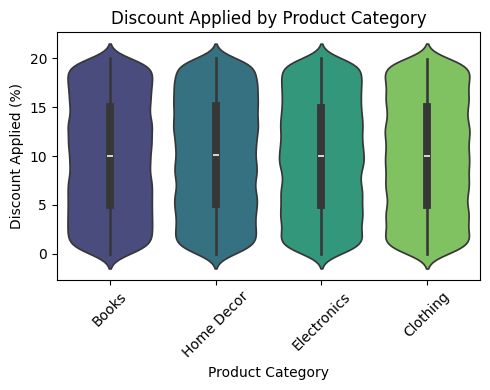

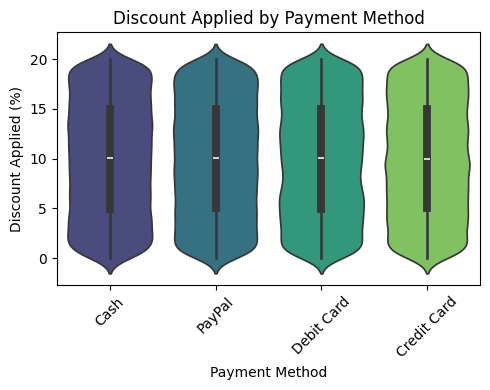

In [ ]:
# Plotting the violin plot for ProductCategory vs. DiscountApplied(%)
plt.figure(figsize=(5, 4))
sns.violinplot(x='ProductCategory', y='DiscountApplied(%)', data=df, palette='viridis',hue='ProductCategory', legend=False)
plt.title('Discount Applied by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Discount Applied (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the violin plot for PaymentMethod vs. DiscountApplied(%)
plt.figure(figsize=(5, 4))
sns.violinplot(x='PaymentMethod', y='DiscountApplied(%)', data=df, palette='viridis',hue='PaymentMethod', legend=False)
plt.title('Discount Applied by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Discount Applied (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Key Insights:

1. The distribution of discounts is remarkably similar across all quantities (1-9).This suggests that the discount policy is generally consistent regardless of the number of items purchased.
2. The most common discounts appear to be in the 5-15% range, as indicated by the wider parts of the violins.
3. There's no clear trend of increasing discounts for larger quantities.
This implies that the business doesn't have a strong bulk purchase incentive policy.

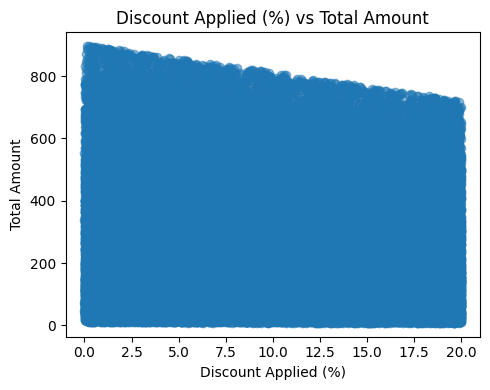

In [ ]:
# Create a figure with subplots
plt.figure(figsize=(5, 4))

plt.scatter(df['DiscountApplied(%)'], df['TotalAmount'], alpha=0.5)
plt.title('Discount Applied (%) vs Total Amount')
plt.xlabel('Discount Applied (%)')
plt.ylabel('Total Amount')

plt.tight_layout()
plt.show()

Key Insights:
1. Negative Correlation: There's a slight negative correlation between discount percentage and total amount, indicating that as discounts increase, total amounts tend to decrease.

2. High-Value Transactions: The highest total amounts (around 800) occur at lower discount percentages (0-5%), suggesting that high-value items or bulk purchases may receive smaller discounts.

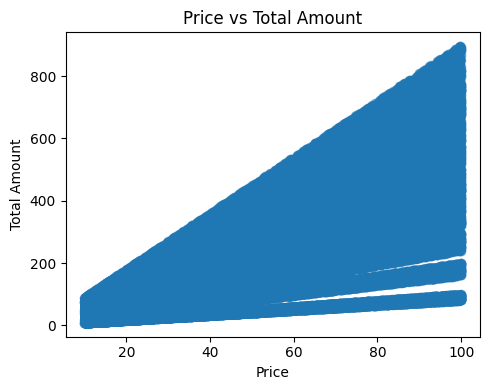

In [ ]:
plt.figure(figsize=(5,4))

plt.scatter(df['Price'], df['TotalAmount'], alpha=0.5)
plt.title('Price vs Total Amount')
plt.xlabel('Price')
plt.ylabel('Total Amount')

plt.tight_layout()
plt.show()

Key Insights:

A strong positive correlation between price and total amount spent, with distinct lines indicating varying quantities of items purchased. Prices range consistently from 10 to 100 dollars.

Q3.  How do customer segments differ in terms of average purchase frequency, basket size, and total spending?

In [ ]:
# Calculate metrics for each segment
segment_metrics = df.groupby(['ProductID', 'PaymentMethod', 'ProductCategory']).agg(
    PurchaseFrequency=('CustomerID', 'count'),
    AverageBasketSize=('ProductCategory', 'size'),
    TotalSpending=('TotalAmount', 'sum')
).reset_index()

# Normalize the basket size by purchase frequency
segment_metrics['AverageBasketSize'] = segment_metrics['AverageBasketSize'] / segment_metrics['PurchaseFrequency']

# Display the segment metrics
segment_metrics.head()

,ProductID,PaymentMethod,ProductCategory,PurchaseFrequency,AverageBasketSize,TotalSpending
0,A,Cash,Books,1500,1.0,381277.059576
1,A,Cash,Clothing,1556,1.0,383343.803952
2,A,Cash,Electronics,1567,1.0,393910.361385
3,A,Cash,Home Decor,1546,1.0,394393.440487
4,A,Credit Card,Books,1558,1.0,390720.899742


In [ ]:
segment_metrics.describe()

,PurchaseFrequency,AverageBasketSize,TotalSpending
count,64.000000,64.0,64.000000
mean,1562.500000,1.0,388023.367287
std,36.159699,0.0,11676.877043
min,1444.000000,1.0,350406.001881
25%,1546.000000,1.0,381022.286780
50%,1565.000000,1.0,389468.439477
75%,1582.000000,1.0,397371.880888
max,1628.000000,1.0,411967.074036


Key insights:
1. Infrequent purchases (mean interval of 4.3 years) but high mean total spending ($388,023.37).

2. Consistent purchasing patterns (low variation in frequency and basket size).

3. Variability in total spending (standard deviation of $11,676.88 ,   range of $60,000+).

4. Evenly distributed spending (balanced high and low spenders).

Q4.  Are there any correlations between customer segments and specific product categories or brands?

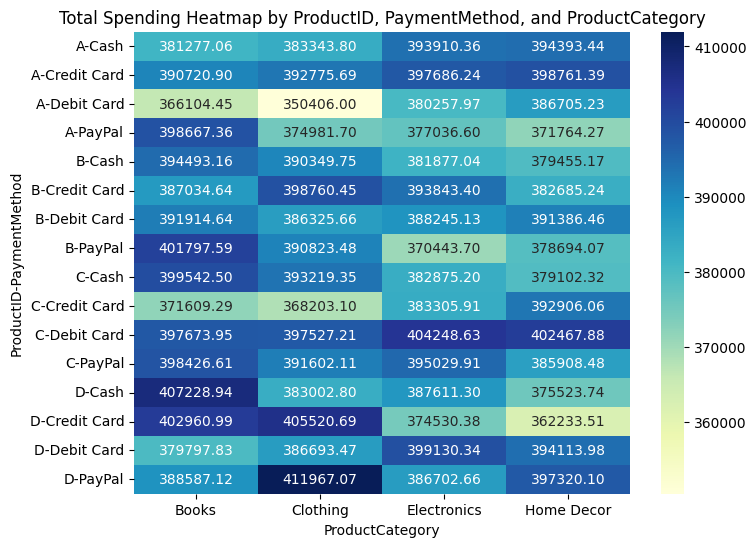

In [ ]:
# Pivoting the dataframe to create a heatmap suitable format
heatmap_data = segment_metrics.pivot_table(index=['ProductID', 'PaymentMethod'], columns='ProductCategory', values='TotalSpending', aggfunc='mean')

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Total Spending Heatmap by ProductID, PaymentMethod, and ProductCategory')
plt.show()

Key Insights:
1. Highest Spending: The highest spending ($411,967.07) is for the D-PayPal-Clothing combination, followed by D-Cash-Books and C-Debit Card-Electronics.

2. Lowest Spending: The lowest spending ($350,406.00) is for A-Debit Card-Clothing, and D-Credit Card-Home Decor also shows relatively low spending.
3. Product ID Patterns: Product ID D exhibits both very high and low spending areas, while A tends to have lower spending overall, especially with Debit Card. B and C show more consistent spending across categories and payment methods.
4. Payment Method Trends: Credit Card and PayPal often correlate with higher spending, while Debit Card frequently shows lower spending, with some exceptions.
5. Product Category Insights: Books generally show consistent, moderate to high spending, Clothing has high variability, and Electronics and Home Decor tend to be in the mid-range.
6. Consistency vs. Variability: Some combinations (like B-PayPal) show high variability across product categories, while others (like A-Credit Card) are more consistent.
7. Specific Observations: A-Debit Card consistently underperforms across all product categories, D-PayPal shows high performance in Clothing but average in other categories, and C-Debit Card performs well across all categories.

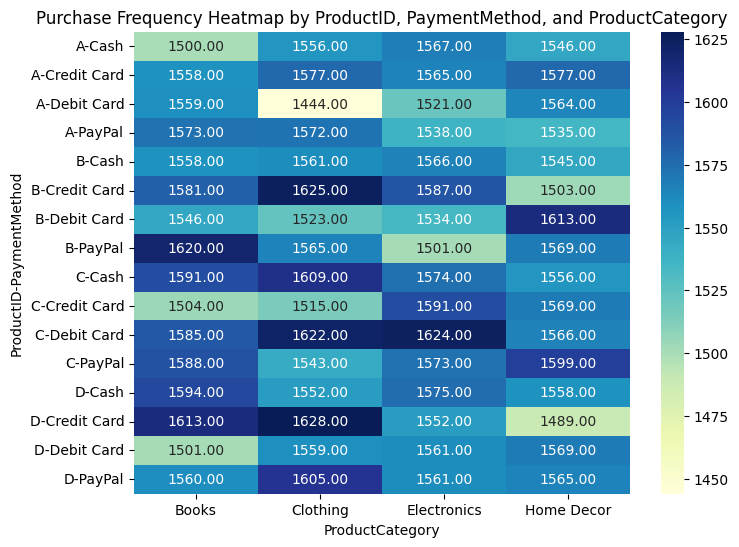

In [ ]:
# Pivoting the dataframe to create a heatmap suitable format
heatmap_data = segment_metrics.pivot_table(index=['ProductID', 'PaymentMethod'], columns='ProductCategory', values='PurchaseFrequency', aggfunc='mean')

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Purchase Frequency Heatmap by ProductID, PaymentMethod, and ProductCategory')
plt.show()

Key Insights:

1. Highest Frequency: The highest purchase frequency (1,628) is for D-Credit Card-Clothing, followed by B-Credit Card-Clothing (1,625) and C-Debit Card-Electronics (1,624).
2. Lowest Frequency: The lowest frequency (1,444) is for A-Debit Card-Clothing, and D-Credit Card-Home Decor also shows a relatively low frequency (1,489).
3. Product ID Patterns: Product ID C exhibits consistently high frequencies across most categories and payment methods, while A tends to have lower frequencies, especially with Debit Card.
4. Payment Method Trends: Credit Card generally shows higher purchase frequencies across most Product IDs and Categories, while Debit Card performance varies significantly.
5. Product Category Insights: Clothing shows high variability in frequency, Electronics tends to have consistently high frequencies, and Books and Home Decor show more moderate frequencies.
6. Consistency vs. Variability: Some combinations (like C-Debit Card) show high consistency across product categories, while others (like D-Credit Card) exhibit high variability.
7. Specific Observations: B-Credit Card performs exceptionally well in Clothing but poorly in Home Decor, C-Debit Card shows high frequencies across all categories, and A-PayPal has relatively consistent frequencies.


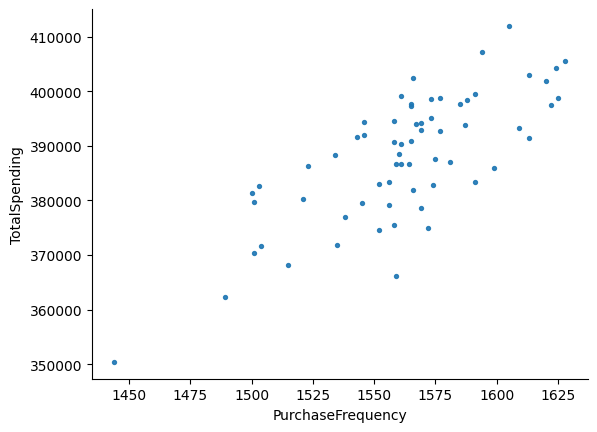

In [ ]:
segment_metrics.plot(kind='scatter', x='PurchaseFrequency', y='TotalSpending', s=8, alpha=.9)
plt.gca().spines[['top', 'right',]].set_visible(False)

Key Insight:

 Some high-frequency combinations show high total spending, but high frequency doesn't always correlate with high spending, suggesting variations in average transaction value.

# **Recommendations and Actionable Insights:**

 **a. Based on the segmentation analysis, what recommendations can be made to tailor marketing strategies or product offerings to each segment?**

1. For the price-sensitive shoppers,
offering higher discounts in the 15-20% range on lower-priced items could effectively capture their attention. Bundling complementary products together may also increase their total order value while maintaining overall value.

2. For the most valuable, high-spending customers, implementing a loyalty program with exclusive perks such as priority access to new products, personalized shopping assistance, or dedicated customer service lines could foster deeper engagement and reinforce important relationships.

3. The bulk buyers represent an intriguing group. Implementing tiered discounts that offer progressively better per-unit pricing with increased quantities could incentivize larger orders. Additionally, offering specialized bulk packaging options might streamline their purchasing process.

4. Targeting category specialists involves highlighting complementary items from other areas of the catalog through strategic bundling or unique promotions to encourage exploration and discovery of new favorites.

5. Regarding customers with strong payment preferences, introducing incentives such as a slight discount for using their preferred payment method could serve as an appealing perk.


**b. How will you track and measure the effectiveness of segmentation-based initiatives over time?**

1. It is recommended to closely monitor key metrics such as average order value, purchase frequency, and overall revenue trends for each segment. Tracking customer behavior shifts, discount redemption rates, and satisfaction levels will also provide valuable insights into the effectiveness of the strategies.

2. Experimentation through A/B testing different approaches within each segment can facilitate rapid identification of the most effective strategies.

**c. Are there any potential limitations or biases in the segmentation approach that need to be addressed?**

Several potential limitations should be considered as the segmentation strategy evolves. These include the possibility that the current model may overlook important demographic factors, seasonal patterns, or nuanced customer preferences and lifestyles. There is also a risk of assuming causation rather than solely correlating factors.

However, by integrating more comprehensive customer data, maintaining flexibility in segmentation approaches, and regularly validating strategies, organizations can develop a robust, customer-centric strategy poised to drive significant growth. Observing how these strategies resonate and exploring additional innovative approaches will be key moving forward.








# **Model Selection and Training:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CustomerID          100000 non-null  int64         
 1   ProductID           100000 non-null  object        
 2   Quantity            100000 non-null  int64         
 3   Price               100000 non-null  float64       
 4   TransactionDate     100000 non-null  datetime64[ns]
 5   PaymentMethod       100000 non-null  object        
 6   StoreLocation       100000 non-null  object        
 7   ProductCategory     100000 non-null  object        
 8   DiscountApplied(%)  100000 non-null  float64       
 9   TotalAmount         100000 non-null  float64       
 10  State               89194 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 8.4+ MB


In [ ]:
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount,State
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764,HI
1,993229,C,4,75.195229,2023-08-05 00:00:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546,MT
2,579675,A,8,31.528816,2024-03-11 18:51:00,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651,MO
3,799826,D,5,98.880218,2023-10-27 22:00:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769,MO
4,121413,A,7,93.188512,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484,VA


In [ ]:
categorical_cols = ['PaymentMethod','ProductCategory','ProductID','Quantity']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [ ]:
df_encoded.head()

,Price,TransactionDate,DiscountApplied(%),TotalAmount,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_Debit Card,PaymentMethod_PayPal,ProductCategory_Books,ProductCategory_Clothing,...,ProductID_D,Quantity_1,Quantity_2,Quantity_3,Quantity_4,Quantity_5,Quantity_6,Quantity_7,Quantity_8,Quantity_9
0,0.778670,2023-12-26 12:32:00,0.933874,0.504116,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,0.724396,2023-08-05 00:00:00,0.706082,0.281610,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.239207,2024-03-11 18:51:00,0.797201,0.229472,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,0.987566,2023-10-27 22:00:00,0.334322,0.510290,False,False,False,True,True,False,...,True,False,False,False,False,True,False,False,False,False
4,0.924324,2023-12-22 11:38:00,0.201507,0.695775,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Select numeric columns to scale
numeric_cols = ['Price','DiscountApplied(%)','TotalAmount']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numeric columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [ ]:
df_encoded.drop(['CustomerID',	'State',	'StoreLocation'], axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [ ]:
# Separate features and target variable
X = df_encoded[[col for col in df_encoded.columns if col != 'TotalAmount']]
y = df_encoded['TotalAmount']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train

75220    0.017560
48955    0.114672
44966    0.193376
13568    0.238260
92727    0.111680
           ...   
6265     0.044975
54886    0.154277
76820    0.198266
860      0.034464
15795    0.486169
Name: TotalAmount, Length: 80000, dtype: float64

In [ ]:
# Initialize Decision Tree Regressor with default hyperparameters
dt = DecisionTreeRegressor(random_state=42)

# Fit the model
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>)

In [ ]:
dt.score(X_test,y_test), dt.score(X_train,y_train)